In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # to save model

# Reproducibility
import random
import tensorflow as tf
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)


In [17]:
X_train = np.load("../data/X_train.npy")
X_test  = np.load("../data/X_test.npy")
y_train = np.load("../data/y_train.npy")
y_test  = np.load("../data/y_test.npy")

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes:
X_train: (398, 30)
X_test: (171, 30)
y_train: (398,)
y_test: (171,)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [19]:
# Hyperparameters (adjustable)
SVM_C = 1.0
SVM_KERNEL = 'rbf'  # rbf / linear / poly

svc_model = SVC(C=SVM_C, kernel=SVM_KERNEL, probability=True, random_state=SEED)
svc_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [20]:
y_pred = svc_model.predict(X_test_scaled)
y_prob = svc_model.predict_proba(X_test_scaled)[:,1]


SVM Accuracy: 0.9766081871345029

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



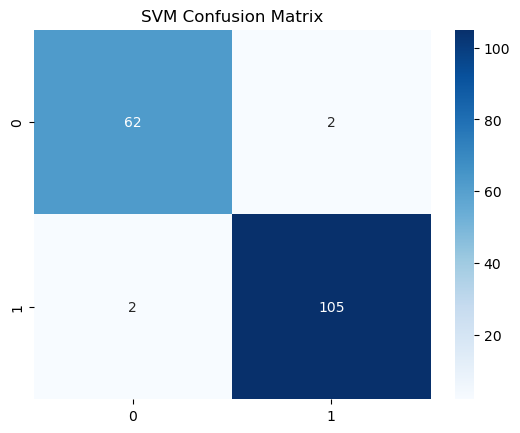

In [21]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVM Accuracy:", accuracy)
print("\nClassification Report:\n", report)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


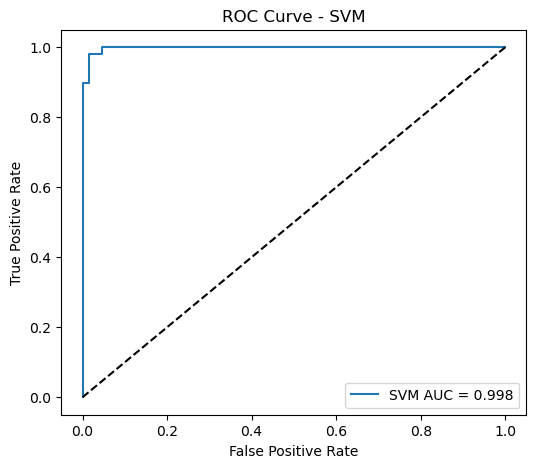

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


In [23]:
joblib.dump(svc_model, "../saved_models/SVM_model.pkl")
print("SVM model saved in saved_models folder.")


SVM model saved in saved_models folder.
